# import numpy as np 
import pandas as pd
import re,string,unicodedata
import os
from os import path

# Visualization Libs
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# NLP Libs
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from keras.preprocessing import text, sequence
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Additional Libs
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [2]:
true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")


In [3]:
true.sample(30)

,title,text,subject,date
11644,Suspects in Malta blogger's murder sent to trial,VALLETTA (Reuters) - Three men accused of kill...,worldnews,"December 21, 2017"
13107,Support for anti-immigration Sweden Democrats ...,STOCKHOLM (Reuters) - Support for the far-righ...,worldnews,"December 5, 2017"
16106,"Senior Tanzania ruling party MP quits, cites d...",DAR ES SALAAM (Reuters) - A senior Tanzanian p...,worldnews,"October 30, 2017"
17377,Islamic State claims two rockets fired from Si...,CAIRO (Reuters) - Islamic state has claimed re...,worldnews,"October 16, 2017"
4189,Pence says working with allies to put pressure...,TOKYO (Reuters) - U.S. Vice President Mike Pen...,politicsNews,"April 19, 2017"
13199,Enter the 'petro': Venezuela to launch oil-bac...,CARACAS (Reuters) - Venezuelan President Nicol...,worldnews,"December 3, 2017"
5047,Ex-Utah Governor Huntsman accepts Trump offer ...,WASHINGTON (Reuters) - Former Utah Republican ...,politicsNews,"March 9, 2017"
10806,"Cruz tax plan would slash U.S. revenue, favor ...",WASHINGTON (Reuters) - A tax plan proposed by ...,politicsNews,"February 16, 2016"
5610,U.S. Senate moves Jeff Sessions toward confirm...,WASHINGTON (Reuters) - The U.S. Senate on Tues...,politicsNews,"February 7, 2017"
20278,Russian military: Syria government troops cont...,MOSCOW (Reuters) - Syrian government forces ha...,worldnews,"September 12, 2017"


In [4]:
fake.sample(30)

,title,text,subject,date
6181,White Students Rape Black Teen With Coat Hang...,A federal lawsuit filed against officials at D...,News,"May 25, 2016"
2239,Watch As MSNBC Reporter Completely Humiliates...,White House Press Secretary Sean Spicer was co...,News,"March 7, 2017"
11534,HORRIBLE! TOP DEMOCRATS Refuse To Stand For Go...,We are blessed to be joined tonight by Carryn ...,politics,"Mar 1, 2017"
9801,‘Far Too Sacred’ LFL Weighs In On NFL Kneeling...,The football league formerly known as the Ling...,politics,"Sep 27, 2017"
983,Time Magazine Tells Trump To Stop Displaying ...,"No one should be surprised about this, but it ...",News,"June 28, 2017"
11242,WATCH BLOCKBUSTER REPORT: Unmasking of Trump C...,FOX News Adam Housley just came out with a gr...,politics,"Mar 31, 2017"
11065,BOOM! WATCH SEAN HANNITY Hit Back At Bogus Sex...,Thank you Sean Hannity for hitting back at the...,politics,"Apr 24, 2017"
20966,LEFTIST PROTESTOR CUTS ELECTRICITY To Trump Ra...,"Every time Trump makes lemons from lemonade, t...",left-news,"Feb 22, 2016"
11163,MARYLAND COUNCILWOMAN Who Struggles To Formula...,Salisbury City Councilwoman April Jackson post...,politics,"Apr 11, 2017"
7495,Pastor Demands Bernie Sanders Convert To Chri...,"According to the right-wing pastor, Mark Burns...",News,"March 14, 2016"


In [5]:
true.shape,fake.shape

((21417, 4), (23481, 4))

In [6]:
true['category'] = 1
fake['category'] = 0

In [7]:
#merge the two datasets into a single dataframe

df = pd.concat([true,fake])

In [8]:
df.sample(30)

,title,text,subject,date,category
20252,Senate leader opposes 'lecturing' Myanmar lead...,WASHINGTON (Reuters) - U.S. Senate Republican ...,worldnews,"September 12, 2017",1
19834,UK foreign minister criticized for resurrectin...,LONDON (Reuters) - Foreign minister Boris John...,worldnews,"September 17, 2017",1
10781,Pope's comments on Trump's Christianity spark ...,(Reuters) - Pope Francis’s remarks on Thursday...,politicsNews,"February 18, 2016",1
21575,HOW FAILED DEMOCRAT LEADERSHIP IS TAKING NYC B...,Miss him yet?Here s an up-close look at a qual...,left-news,"Jul 11, 2015",0
10888,FULL INTERVIEW: Judge Jeanine Pirro’s In-Depth...,JUDGE JEANINE PIRRO S INTERVIEW WITH PRESIDENT...,politics,"May 13, 2017",0
10113,STEVE BANNON JUST MADE A BIG ANNOUNCEMENT Abou...,Former White House Chief Strategist Stephen K....,politics,"Aug 18, 2017",0
2998,Atlanta Mayor And Newspaper DESTROY Trump For...,Donald Trump called Atlanta a crime infested ...,News,"January 15, 2017",0
3644,Trump asked two top intelligence officials to ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"May 22, 2017",1
17792,JUDICIAL WATCH INVESTIGATOR: Here’s why we’re ...,Chris Farrell is the Judicial Watch Director o...,left-news,"Oct 19, 2017",0
6199,BREAKING: DOJ To Seek Death Penalty For Charl...,"Almost a year ago, a deranged white supremacis...",News,"May 24, 2016",0


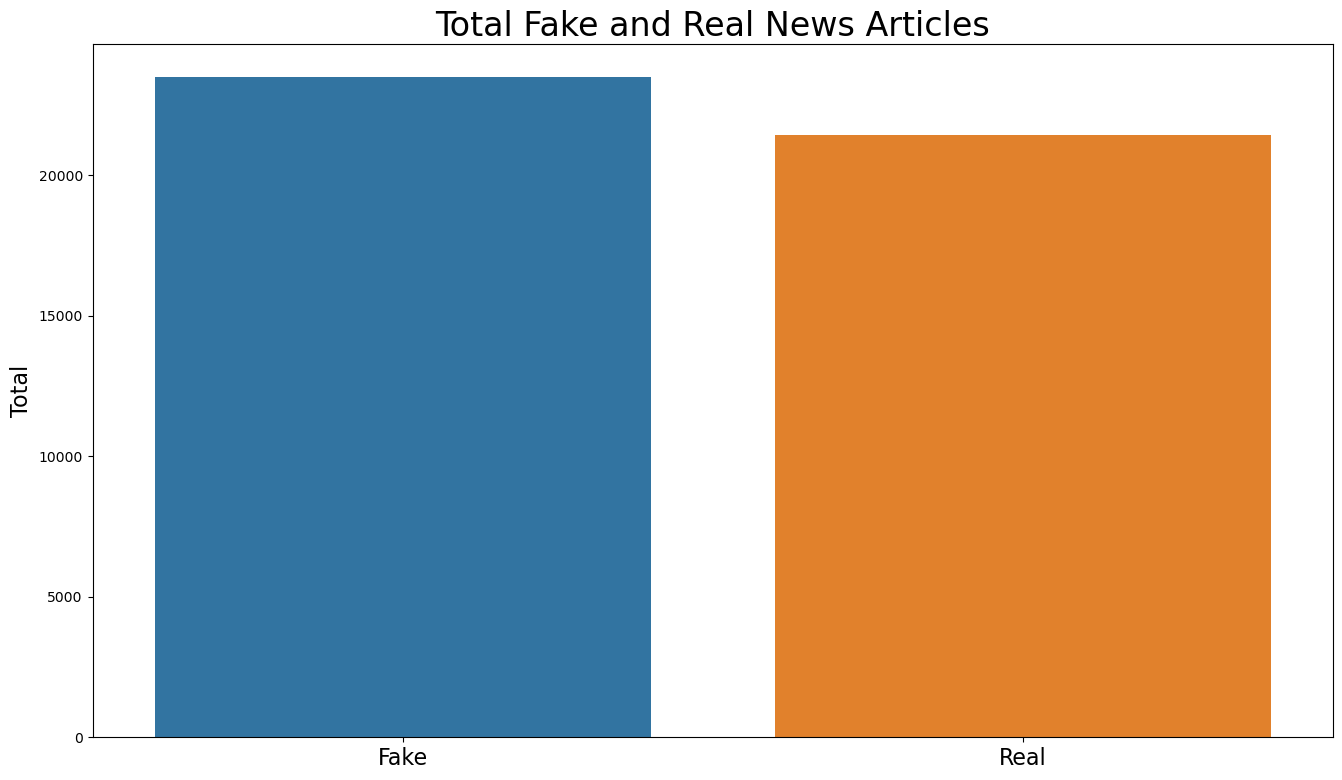

In [9]:
plt.figure(figsize=(16,9))

sns.countplot(data=df, x='category')
plt.title('Total Fake and Real News Articles', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks([0, 1], ['Fake', 'Real'], fontsize=16)

plt.show()

In [10]:
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [12]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

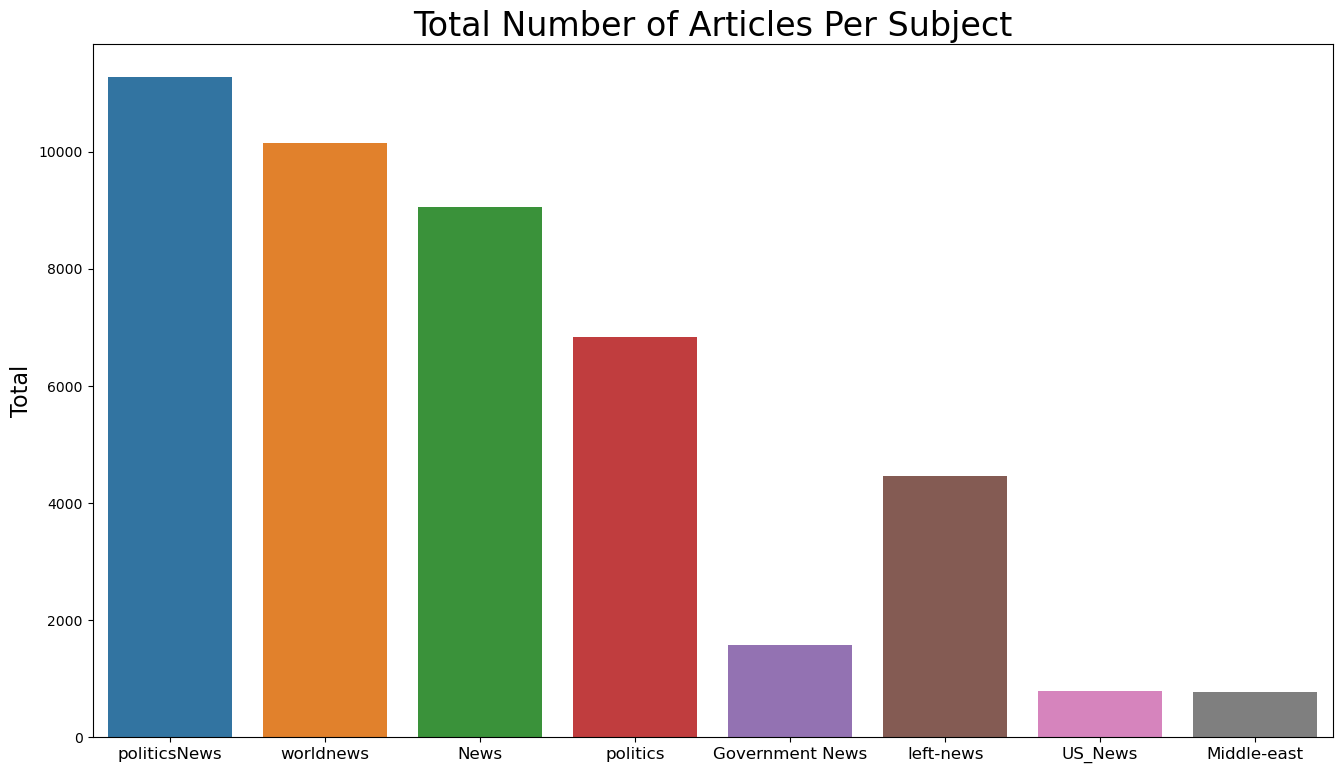

In [13]:
plt.figure(figsize=(16,9))
sns.countplot(x='subject', data=df)

plt.title('Total Number of Articles Per Subject', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=12)

plt.show()

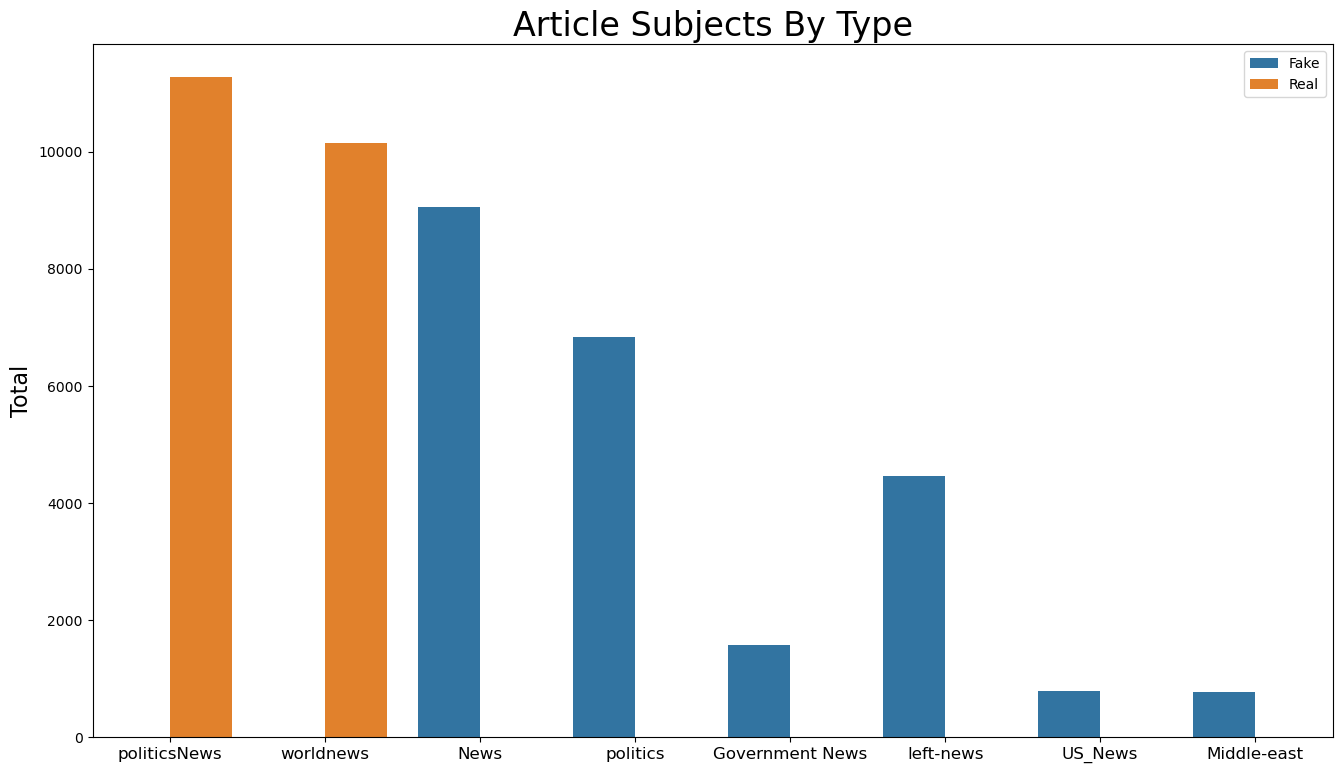

In [14]:
plt.figure(figsize=(16,9))
sns.countplot(x='subject', hue='category', data=df)

plt.title('Article Subjects By Type', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.legend(['Fake', 'Real'])

plt.show()

In [15]:
df.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [16]:
#creating corpus to be used in nlp
#create a single column with all relevant text

df['text'] = df['title'] + " " + df['text']

#delete all the other columns we do not need.
del df['title'] # added to our text corpus
del df['subject'] # would affect our results
del df['date'] #for future analysis that spans more time, but we will delete it for now.

<function matplotlib.pyplot.show(close=None, block=None)>

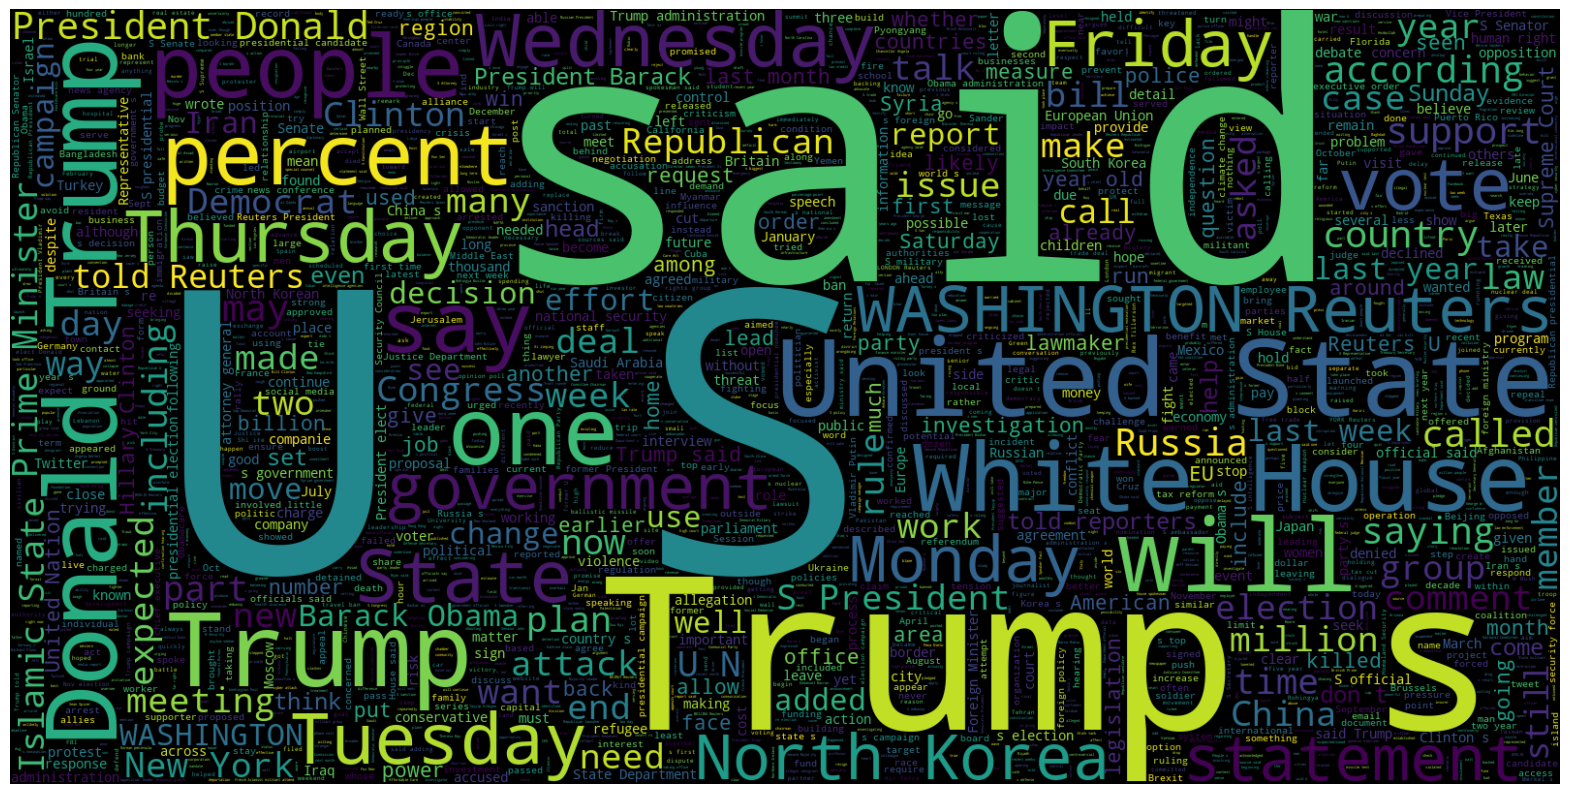

In [17]:
plt.figure(figsize = (20,20)) # Text from the real news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

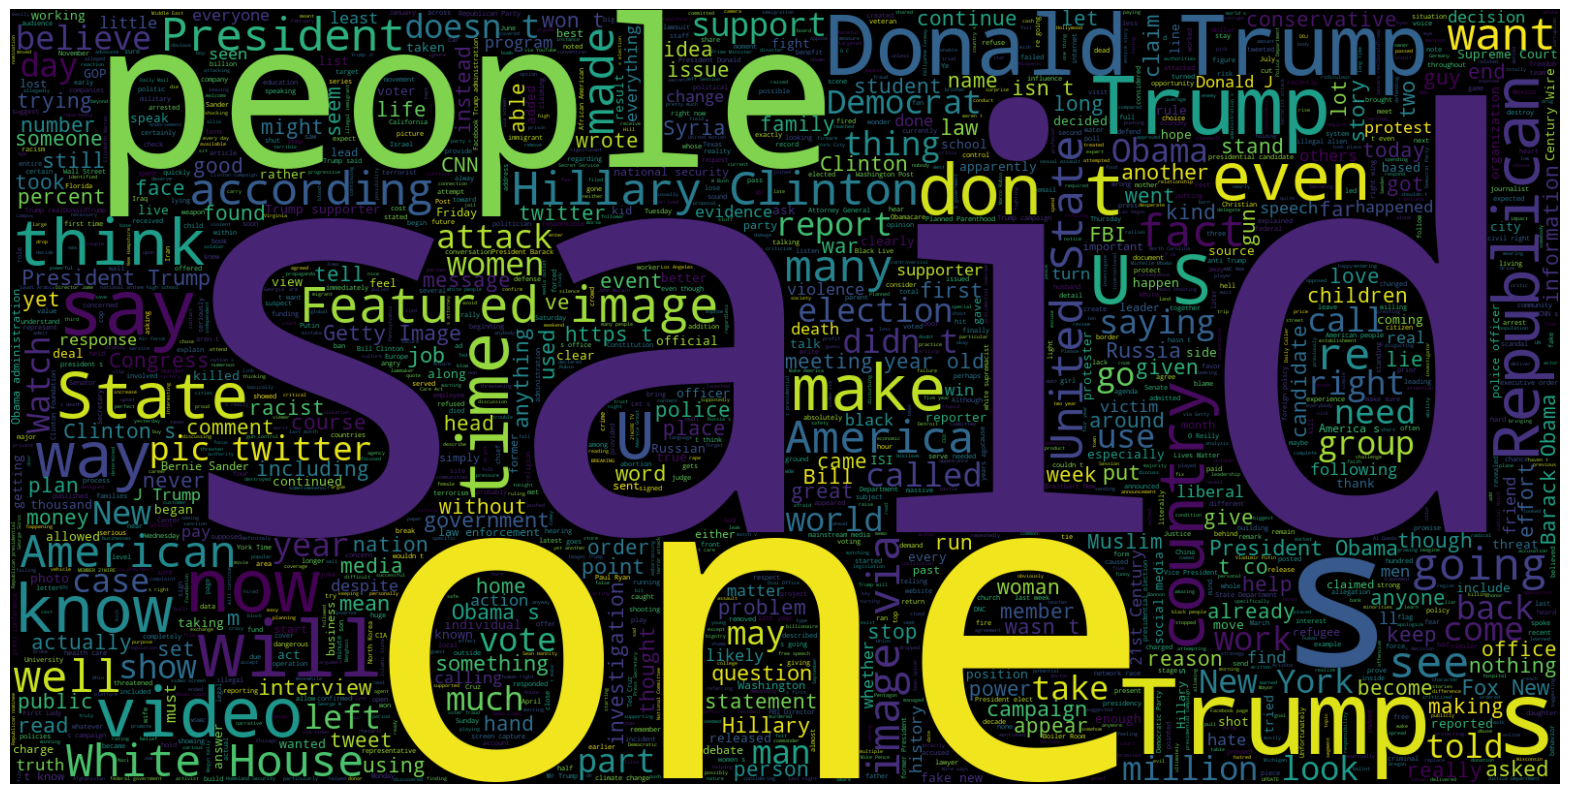

In [18]:
plt.figure(figsize = (20,20)) # Text from the fake news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

plt.axis("off")
plt.show

In [19]:
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krishnachadha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


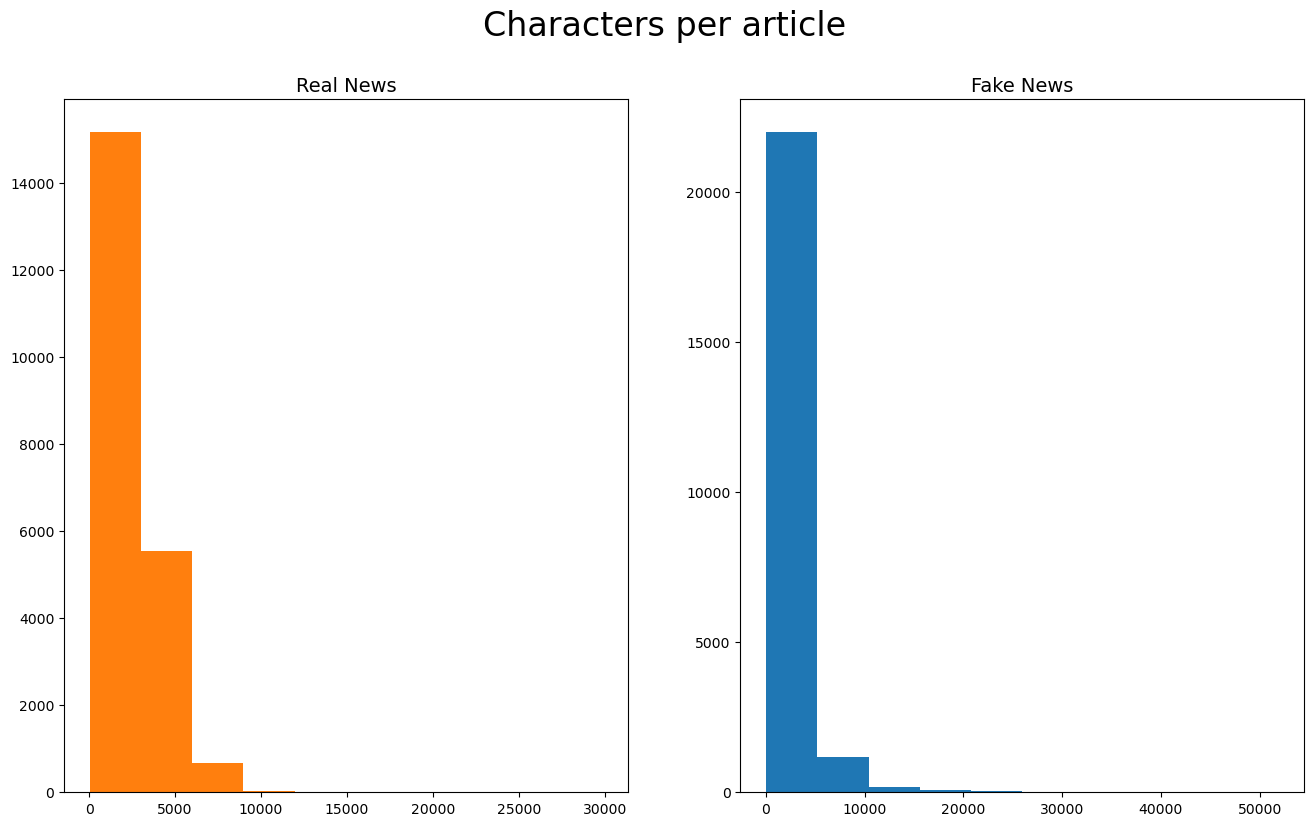

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))
text_len=df[df['category']==1]['text'].str.len()
ax1.hist(text_len,color='tab:orange')
ax1.set_title('Real News', fontsize=14)
text_len=df[df['category']==0]['text'].str.len()
ax2.hist(text_len,color='tab:blue')
ax2.set_title('Fake News', fontsize=14)
fig.suptitle('Characters per article', fontsize=24)
plt.show()

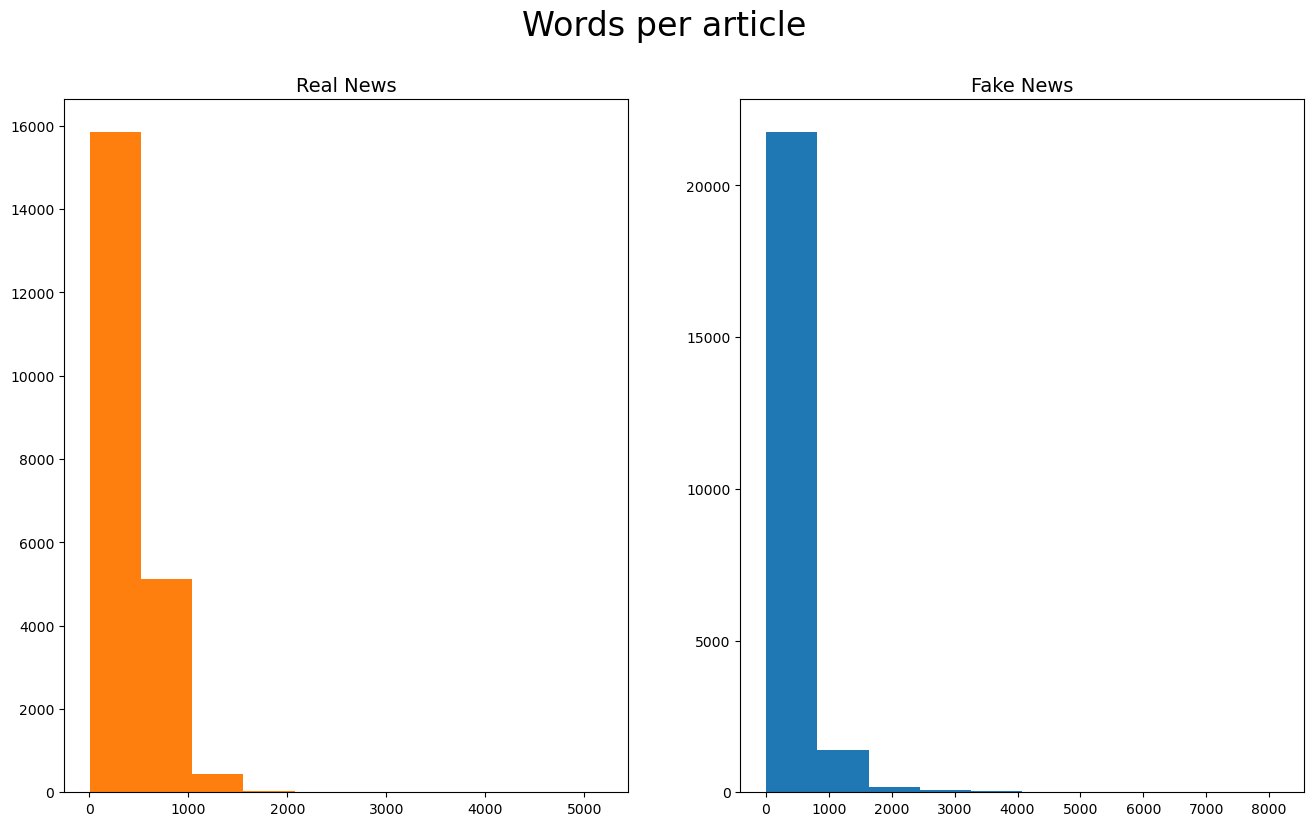

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))
text_len=df[df['category']==1]['text'].str.split().map(lambda x:
len(x))
ax1.hist(text_len,color='tab:orange')
ax1.set_title('Real News', fontsize=14)
text_len=df[df['category']==0]['text'].str.split().map(lambda x:
len(x))
ax2.hist(text_len,color='tab:blue')
ax2.set_title('Fake News', fontsize=14)
fig.suptitle('Words per article', fontsize=24)
plt.show()

In [22]:
X = df.text
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8,stratify=y, random_state=19)
# Create of Count Vectorize object
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3)) 
# Transform the train dataset
cv_train=cv.fit_transform(X_train)
# Transform the test dataset
cv_test=cv.transform(X_test)
print('Bag of words Train:',cv_train.shape)
print('Bag of words Test:',cv_test.shape)


Bag of words Train: (35918, 6616990)
Bag of words Test: (8980, 6616990)


In [23]:
# Create the TF-IDF object
tfidf=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3)
)
# Transform the train dataset
tfidf_train=tfidf.fit_transform(X_train)
# Transform the test dataset
tfidf_test=tfidf.transform(X_test)
print('TF-IDF Train:',tfidf_train.shape)
print('TF-IDF Test:',tfidf_test.shape)


TF-IDF Train: (35918, 6616990)
TF-IDF Test: (8980, 6616990)


In [24]:
from sklearn.naive_bayes import MultinomialNB

# Create our model object
mnb = MultinomialNB()

# Fit the model to the Bag of words CountVectorizer
mnb_cv = mnb.fit(cv_train, y_train)

# Fit the model to the TF-IDF features
mnb_tfidf = mnb.fit(tfidf_train, y_train)


In [25]:

# Predicting the model for bag of words
mnb_cv_predict=mnb.predict(cv_test)

# Predicting the model for tf-idf features
mnb_tfidf_predict=mnb.predict(tfidf_test)


In [26]:
# Check the accuracy score for bag of words
mnb_cv_score=accuracy_score(y_test, mnb_cv_predict)
print("Naive Bayes Bag of words accuracy score:", mnb_cv_score)

# Check the accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
print("Naive Bayes TF-IDF accuracy score:", mnb_tfidf_score)

Naive Bayes Bag of words accuracy score: 0.9434298440979956
Naive Bayes TF-IDF accuracy score: 0.9208240534521158


In [27]:
mnb_cv_report = classification_report(y_test, mnb_cv_predict, target_names = ['0','1'])
print(mnb_cv_report)
mnb_tfidf_report = classification_report(y_test, mnb_tfidf_predict, target_names = ['0','1'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4696
           1       0.95      0.93      0.94      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4696
           1       0.97      0.86      0.91      4284

    accuracy                           0.92      8980
   macro avg       0.93      0.92      0.92      8980
weighted avg       0.93      0.92      0.92      8980

